# TimeSTAMP MRI Data Quality

The TimeSTAMP MR images had varying degrees of quality and readability, which gradually degraded as the imaging moved caudally down the spine. This notebook illustrates the distribution of quality across all images for all 17 patients. Images clustered around medium-quality, with 42% being medium-quality and only 12% (149/1200) being unreadable. 784 images were included in the medium-to-high quality image analyses (or 65% of images).

**Authors:**
* Andrew Roman, andrew.roman@commonspirit.org, aeroman2@asu.edu
* Jakob Perivolotis, jperivol@asu.edu

## Import libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import seaborn.objects as sobj

seaborn.set_context('notebook') # Make graphs aesthetically notebook-friendly

plt.rcParams['figure.dpi'] = 300 # Set image resolution

In [2]:
csf_flow_df = pd.read_csv('../../data/CSF_Flow_TimeSTAMP_measurements.csv')

In [3]:
csf_flow_df.head()

,patient_id,age,spinal_region,image_group,image_number,foramen_magnum_distance,super_ante_displacement,infer_ante_displacement,super_post_displacement,infer_post_displacement,super_ante_width,infer_ante_width,super_post_width,infer_post_width,ante_qual_direction,post_qual_direction,image_quality
0,2,24,C2-3,1,1,NaN,-3.29,-5.02,2.26,-1.067,3.29,4.339,3.65,2.503,caudal,rostral,high
1,2,24,C2-3,1,2,NaN,3.676,1.808,1.804,0,5.348,4.391,3.04,2.45,rostral,rostral,high
2,2,24,C2-3,1,3,NaN,-4.33,-9.174,0.8,-4.159,4.099,4.015,2.879,2.042,caudal,caudal,high
3,2,24,C2-3,1,4,NaN,1.194,0,1.717,0,4.207,4.192,3.1,3.385,rostral,rostral,high
4,2,24,C2-3,1,5,NaN,2.585,2.58,1.173,0,4.541,4.4,3.058,2.364,rostral,rostral,high


In [4]:
csf_flow_df.describe()

,patient_id,age,image_group,image_number,foramen_magnum_distance
count,1200.000000,1200.000000,1200.000000,1200.000000,0.0
mean,19.060000,29.038333,1.060000,10.000000,NaN
std,10.644599,6.858284,0.264181,8.389994,NaN
min,2.000000,23.000000,1.000000,1.000000,NaN
25%,8.000000,25.000000,1.000000,4.000000,NaN
50%,22.000000,25.000000,1.000000,7.000000,NaN
75%,28.500000,30.000000,1.000000,15.250000,NaN
max,31.000000,45.000000,3.000000,30.000000,NaN


### Get rid of NaN rows and empty columns

In [5]:
csf_flow_df = csf_flow_df.dropna(axis=1, thresh=100)
csf_flow_df = csf_flow_df[csf_flow_df['patient_id'].notna()]

In [6]:
csf_flow_df

,patient_id,age,spinal_region,image_group,image_number,super_ante_displacement,infer_ante_displacement,super_post_displacement,infer_post_displacement,super_ante_width,infer_ante_width,super_post_width,infer_post_width,ante_qual_direction,post_qual_direction,image_quality
0,2,24,C2-3,1,1,-3.29,-5.02,2.26,-1.067,3.29,4.339,3.65,2.503,caudal,rostral,high
1,2,24,C2-3,1,2,3.676,1.808,1.804,0,5.348,4.391,3.04,2.45,rostral,rostral,high
2,2,24,C2-3,1,3,-4.33,-9.174,0.8,-4.159,4.099,4.015,2.879,2.042,caudal,caudal,high
3,2,24,C2-3,1,4,1.194,0,1.717,0,4.207,4.192,3.1,3.385,rostral,rostral,high
4,2,24,C2-3,1,5,2.585,2.58,1.173,0,4.541,4.4,3.058,2.364,rostral,rostral,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,31,25,T6-7,1,26,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable
1196,31,25,T6-7,1,27,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable
1197,31,25,T6-7,1,28,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable
1198,31,25,T6-7,1,29,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable,unreadable


## Convert Data to Correct Types

In [7]:
# Make image quality and spinal region columns into categories for easier sorting and graphing
quality_order = ['unreadable', 'low', 'medium', 'high']
csf_flow_df['image_quality'] = pd.Categorical(csf_flow_df['image_quality'],
                                                categories=quality_order,
                                                ordered=True
                                               )

spinal_region_order = ['C2-3', 'C5-6', 'C7-T1', 'T1', 'T1-2', 'T3-4', 'T6-7']
csf_flow_df['spinal_region'] = pd.Categorical(csf_flow_df['spinal_region'],
                                                categories=spinal_region_order,
                                                ordered=True
                                               )
csf_flow_df.dtypes

patient_id                    int64
age                           int64
spinal_region              category
image_group                   int64
image_number                  int64
super_ante_displacement      object
infer_ante_displacement      object
super_post_displacement      object
infer_post_displacement      object
super_ante_width             object
infer_ante_width             object
super_post_width             object
infer_post_width             object
ante_qual_direction          object
post_qual_direction          object
image_quality              category
dtype: object

## Data Specs

In [8]:
num_subjects = len(csf_flow_df['patient_id'].unique())
print(f'Number of subjects: {num_subjects}')

Number of subjects: 17


In [9]:
print(f'Number of images: {csf_flow_df.shape[0]}')

Number of images: 1200


In [10]:
print(f'Number of images for each intervertebral region:\n{csf_flow_df['spinal_region'].value_counts()}')

Number of images for each intervertebral region:
spinal_region
C5-6     256
T1-2     240
C2-3     232
T3-4     224
T6-7     224
T1        16
C7-T1      8
Name: count, dtype: int64


## Overall Image Quality

In [11]:
image_quality = csf_flow_df['image_quality'].value_counts()
image_quality = pd.DataFrame(image_quality)
image_quality = image_quality.reset_index() # make sure the quality column isn't set as the index

In [12]:
quality_order = ['unreadable', 'low', 'medium', 'high']
image_quality['image_quality'] = pd.Categorical(image_quality['image_quality'],
                                                categories=quality_order,
                                                ordered=True
                                               )
image_quality = image_quality.sort_values('image_quality')
image_quality

,image_quality,count
3,unreadable,149
2,low,267
0,medium,498
1,high,286


In [13]:
# Percentages of image quality
image_quality['percentages'] = image_quality['count'] / 1200 * 100
image_quality

,image_quality,count,percentages
3,unreadable,149,12.416667
2,low,267,22.250000
0,medium,498,41.500000
1,high,286,23.833333


[Text(0.5, 0, 'Quality'), Text(0, 0.5, 'Count')]

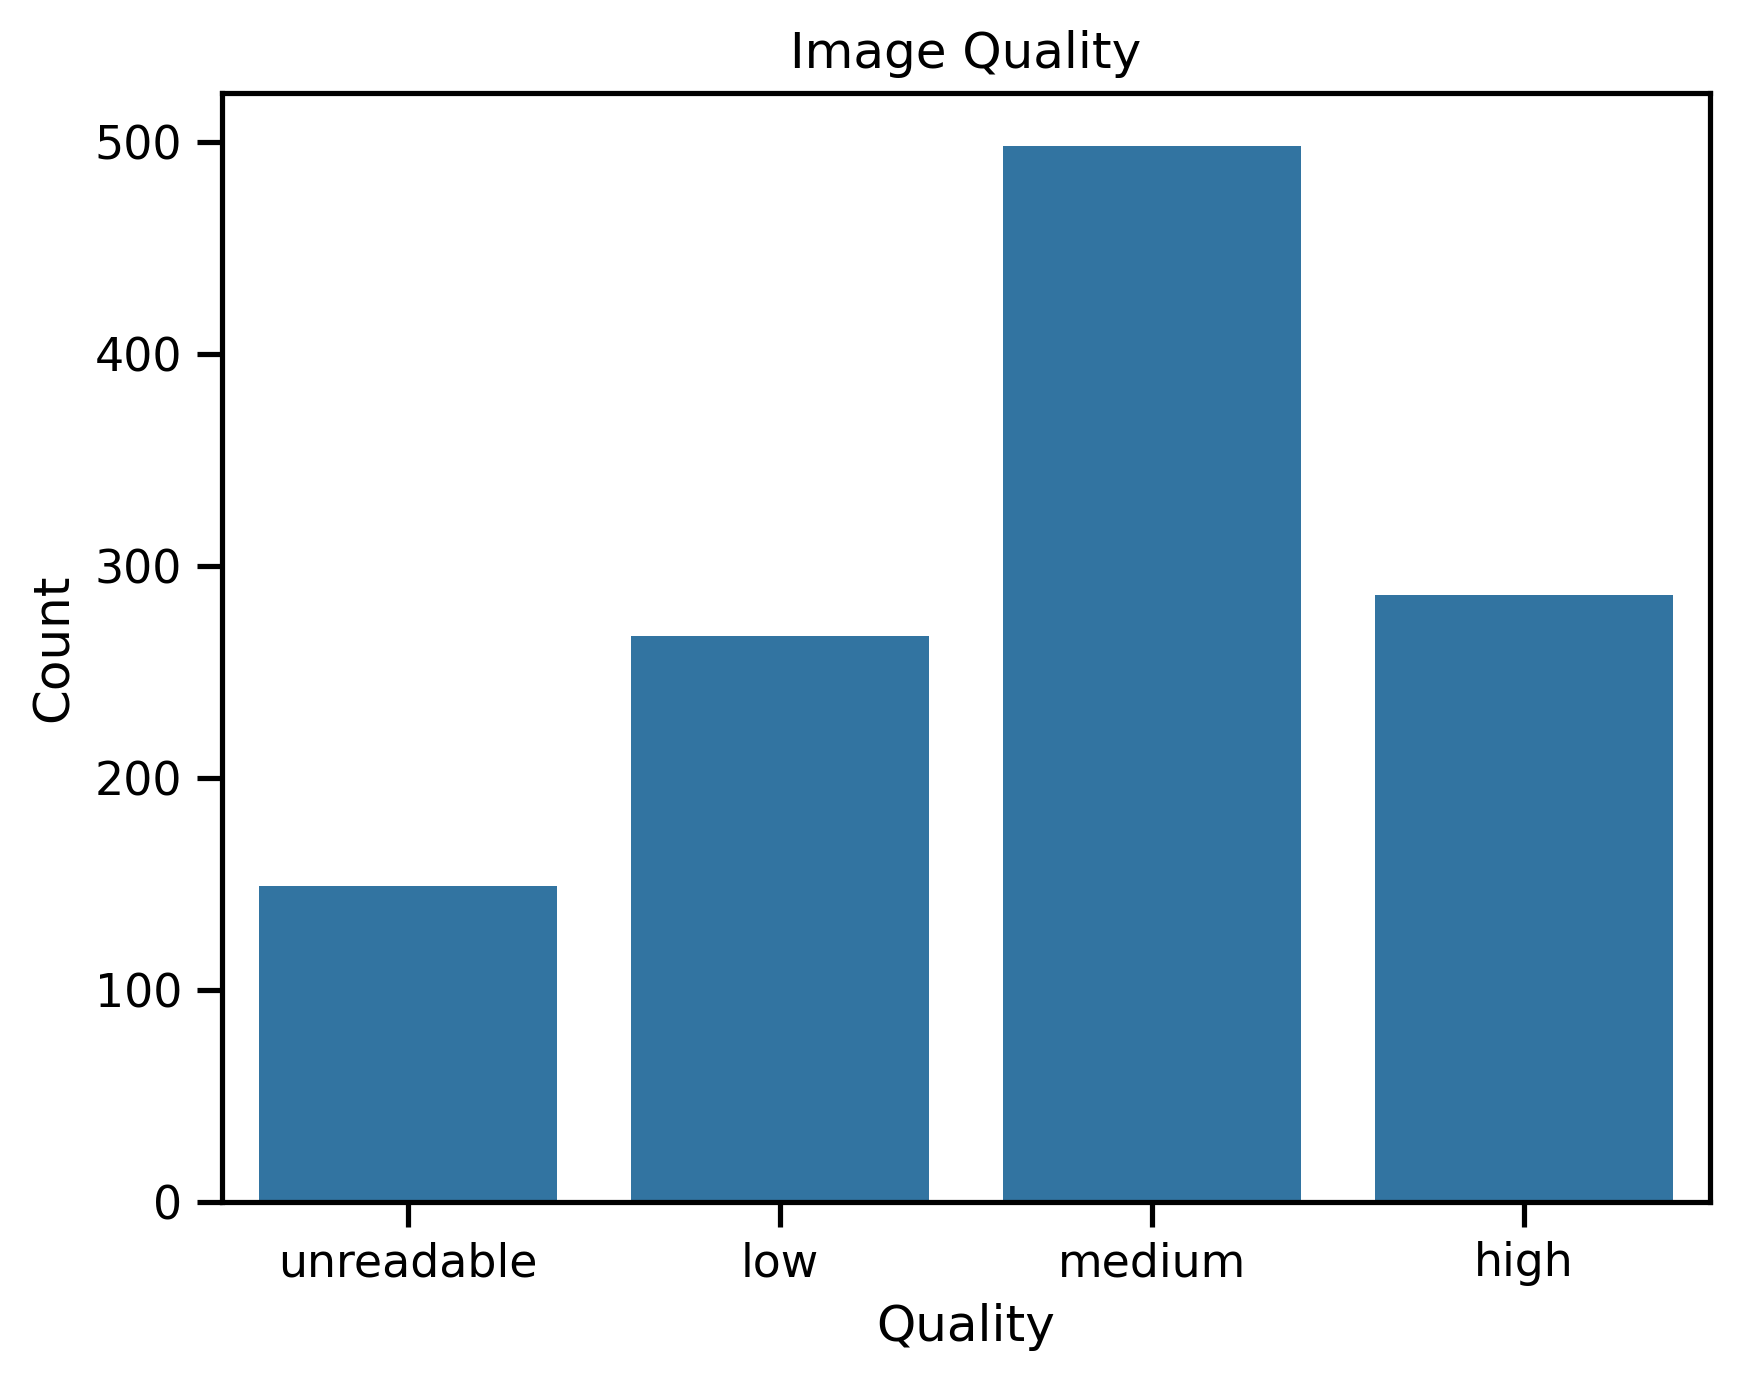

In [14]:
bar_graph = seaborn.barplot(image_quality, x='image_quality', y='count')
bar_graph.set_title('Image Quality')
bar_graph.set(xlabel='Quality', ylabel='Count')

## Image Quality by Region

Note that a few TimeSTAMP images were taken at the `C7-T1` and `T1`-only regions along the spine. 8 images were taken at the `C7-T1` intervertebral region and 16 images were taken at the `T1` vertebra.

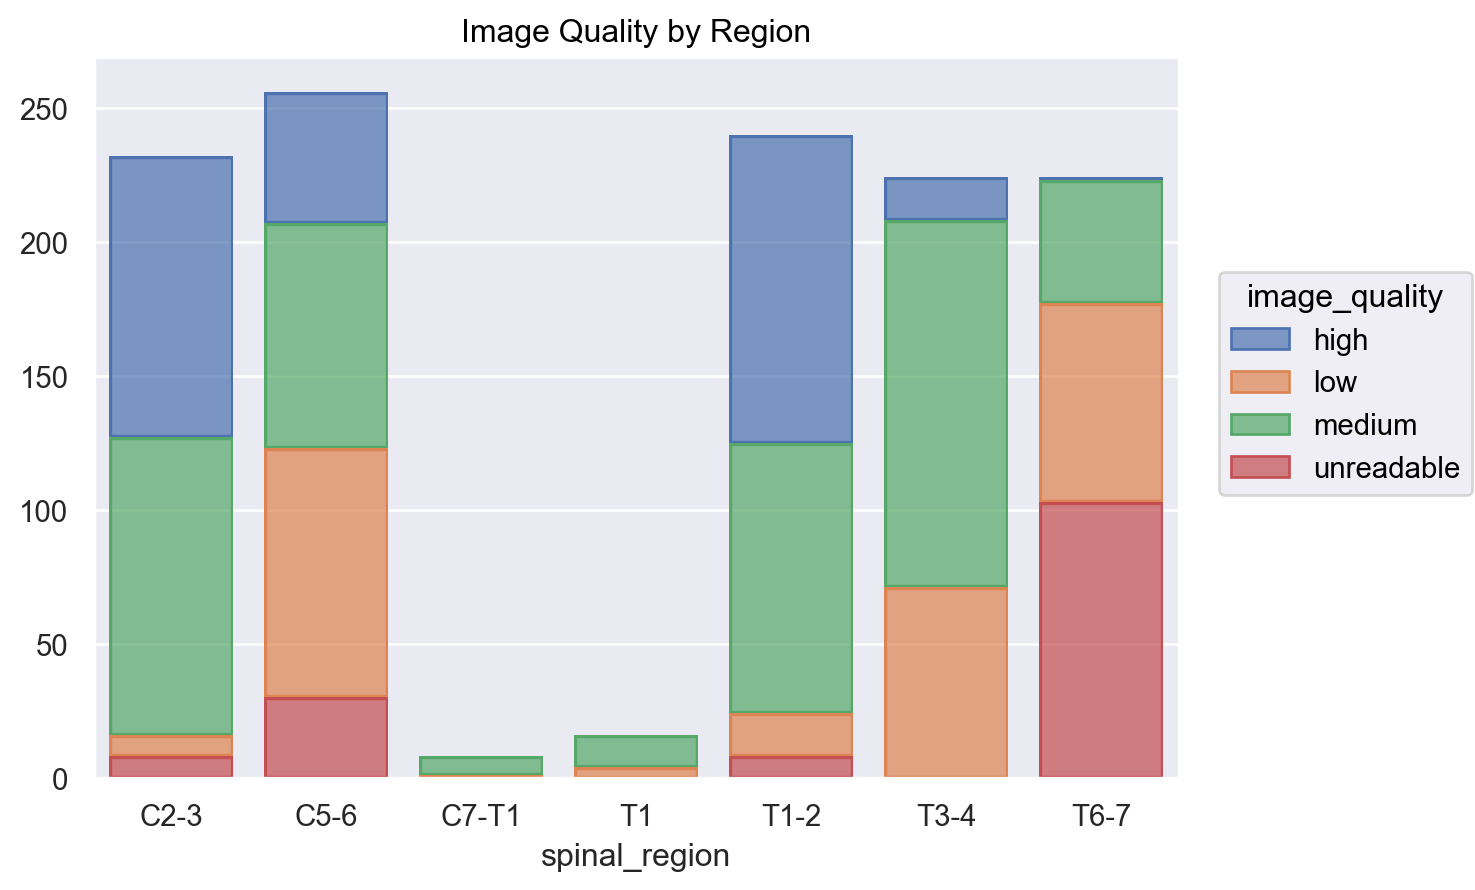

In [15]:
quality_plot = (sobj.Plot(csf_flow_df, x='spinal_region', color='image_quality').add(sobj.Bar(), sobj.Count(), sobj.Stack()))
quality_plot.label(title='Image Quality by Region', fontsize=50)

/var/folders/ff/0dllkckn7pd79t2n01pcp8r40000gn/T/ipykernel_97062/1309552956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_major_vertebral_regions_df['spinal_region'] = pd.Categorical(only_major_vertebral_regions_df['spinal_region'],


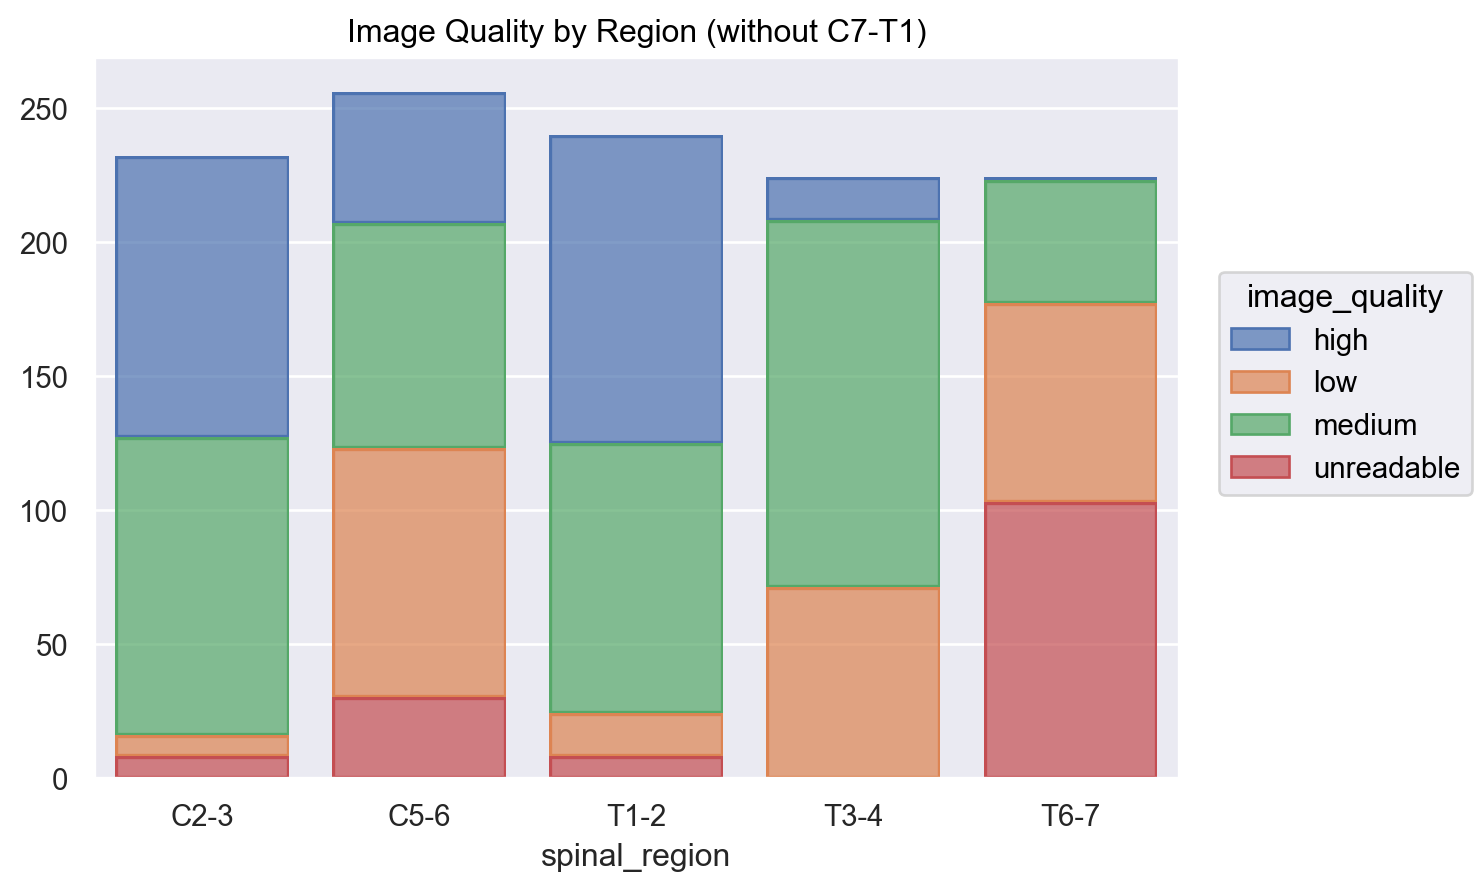

In [16]:
# Remove C7-T1 and T1 images, since there are very few. Also remove these from Categorical object list.
only_major_vertebral_regions_df = csf_flow_df[~csf_flow_df['spinal_region'].isin(['C7-T1', 'T1'])]
spinal_region_order_reduced = ['C2-3', 'C5-6', 'T1-2', 'T3-4', 'T6-7']
only_major_vertebral_regions_df['spinal_region'] = pd.Categorical(only_major_vertebral_regions_df['spinal_region'],
                                                categories=spinal_region_order_reduced,
                                                ordered=True
                                               )

# Re-plot image quality without C7-T1 and T1 images
quality_plot = (
                sobj.Plot(only_major_vertebral_regions_df, x='spinal_region', color='image_quality')
                .add(sobj.Bar(), sobj.Count(), sobj.Stack())
)
quality_plot.label(title='Image Quality by Region (without C7-T1)', fontsize=50)

## Statistical Power

Considering that the total number of CSF flow measurements captured was 4,480 for all images of all qualities and was 3,136 for images of `medium` and `high` qualities, it is possible to achieve an analysis with a high power while getting results with a p-value of < 0.05. Note that this power analysis is for T-tests but that Pearson correlation coefficients ("Pearson r") are also used elsewhere in this set of notebooks.

In [17]:
import statsmodels.stats.power as smp

power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.1, power=0.95, alpha=0.05)
sample_size

2599.902655670425

#### This shows that:
* The **C2-3** and **T1-2** regions had the highest proportion of high quality images
* The proportion of low quality image increased as imaging moved caudally.
* The cause of the disproportionate number of low-quality images in **C5-6** is not known. However, no unreadable images were noted in this region.

#### Therefor:
* Cervical and upper thoracic images will provide a more accurate and precise picture of CSF flow than lower thoracic images for their respective SSAS areas.
* We can discard the "low-quality" and "unreadable" images and still have enough data to make a reasonable, statistically significant model